# Downloading & Saving the dataset

# Getting our Workspace Ready!

In [1]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 15.5MB/s 
     |████████████████████████████████| 952kB 25.7MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=b6098cf060096b6f339c17ae9ec9b0e6596ec9fcacd4595724e9beba576d6c06
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install cpython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


!pip install --upgrade git+git://github.com/wandb/client.git

!pip install --upgrade matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 17kB/s 
     |████████████████████████████████| 4.0MB 39.6MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.4.0+cu100 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 276kB 15.5MB/s 
  Created wheel for cpython: filename=cPython-0.0.6-cp37-none-any.whl size=4913 sha256=d65bba7c928bf068ac823fa299656004a9937aec66dab1325f75812e2c8b3534
  Stored in directory: /root/.cache/pip/wheels/96/a8/ca/1e4bbac2c17f655877b9abcb468bc67fb14ce349da01e48372
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=7921780678

In [1]:
# Importing detectron2 & torch

import detectron2
import torch
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_test_loader
from detectron2.structures import BoxMode
from detectron2.utils.events import get_event_storage
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Importing some common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import  train_test_split
import wandb
from ast import literal_eval
import cv2
import os
import glob



In [2]:
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
!wandb login d6cc112cedb814d20dcaca0759e9f2140dc33f6a

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Reading our dataset


In [5]:
dataset = pd.read_csv("/content/drive/My Drive/augmented/data.csv")

In [6]:
dataset

,Unnamed: 0,image_id,bbox
0,0,1.png,"[461, 81, 4, 12]"
1,1,1.png,"[635, 78, 15, 5]"
2,2,1.png,"[635, 83, 16, 4]"
3,3,1.png,"[604, 136, 8, 12]"
4,4,1.png,"[600, 137, 7, 14]"
...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]"
43971,43988,1514.png,"[589, 654, 8, 8]"
43972,43989,1514.png,"[431, 643, 18, 6]"
43973,43990,1514.png,"[444, 739, 12, 6]"


In [7]:
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset

,Unnamed: 0,image_id,bbox
0,0,1.png,"[461, 81, 4, 12]"
1,1,1.png,"[635, 78, 15, 5]"
2,2,1.png,"[635, 83, 16, 4]"
3,3,1.png,"[604, 136, 8, 12]"
4,4,1.png,"[600, 137, 7, 14]"
...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]"
43971,43988,1514.png,"[589, 654, 8, 8]"
43972,43989,1514.png,"[431, 643, 18, 6]"
43973,43990,1514.png,"[444, 739, 12, 6]"


# Image Visualisations

In [9]:
def show_images(images_id):

  for image_id in images_id:

    img_path = '/content/drive/My Drive/dataset_inverted/'+image_id

    img = plt.imread(img_path)

    bboxs = [literal_eval(box) for box in dataset[dataset['image_id'] == image_id]['bbox']] 

    for bbox in bboxs:

      bbox = list(map(int, bbox))

      cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (0, 255, 0), 2)

    plt.imshow(img)

    plt.show()

In [10]:
[dataset['image_id'].unique()[1000]]

['1006.png']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


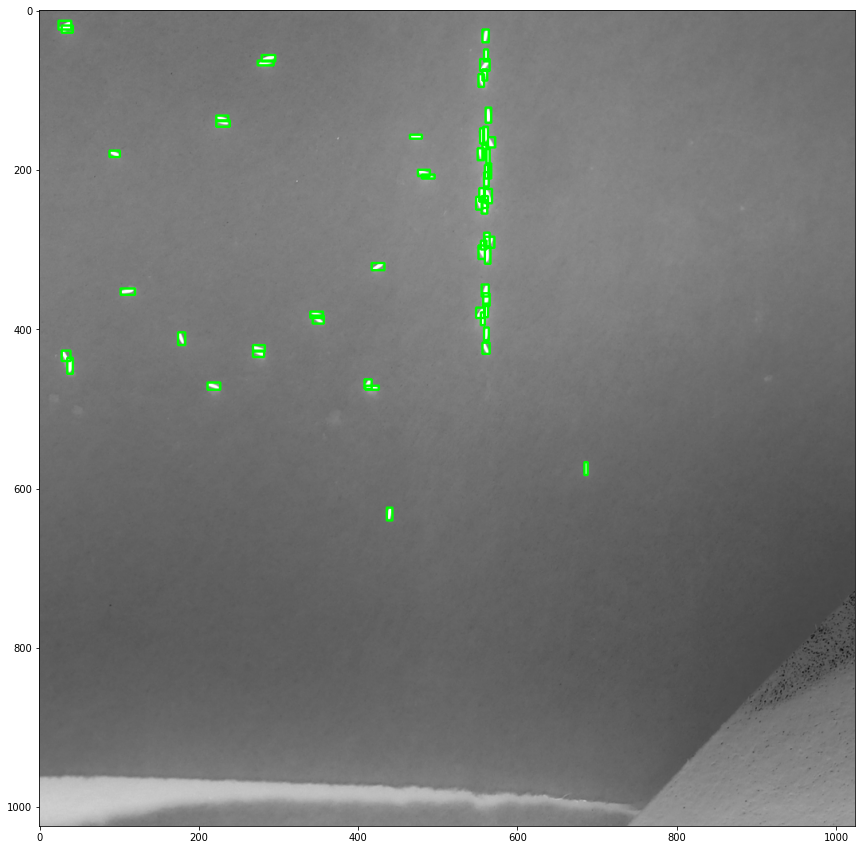

In [11]:

show_images([dataset['image_id'].unique()[1000]])


# Making Training & Validation Data

In [12]:
# Assigning each unique image_id with corresponding category_id

dataset['image_category_id'] = dataset.groupby("image_id").ngroup()
dataset

,Unnamed: 0,image_id,bbox,image_category_id
0,0,1.png,"[461, 81, 4, 12]",0
1,1,1.png,"[635, 78, 15, 5]",0
2,2,1.png,"[635, 83, 16, 4]",0
3,3,1.png,"[604, 136, 8, 12]",0
4,4,1.png,"[600, 137, 7, 14]",0
...,...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]",572
43971,43988,1514.png,"[589, 654, 8, 8]",572
43972,43989,1514.png,"[431, 643, 18, 6]",572
43973,43990,1514.png,"[444, 739, 12, 6]",572


## Spliting our Dataset into Training & Validation

In [13]:

unique_imgs_id = dataset['image_id'].unique()
train_data = unique_imgs_id

train_imgs_id, val_imgs_id = train_test_split(unique_imgs_id, test_size=0.2, shuffle=False)

train_df = dataset[dataset['image_id'].isin(train_imgs_id)]
val_df = dataset[dataset['image_id'].isin(val_imgs_id)]

In [14]:
train_df, val_df

(       Unnamed: 0  image_id               bbox  image_category_id
 0               0     1.png   [461, 81, 4, 12]                  0
 1               1     1.png   [635, 78, 15, 5]                  0
 2               2     1.png   [635, 83, 16, 4]                  0
 3               3     1.png  [604, 136, 8, 12]                  0
 4               4     1.png  [600, 137, 7, 14]                  0
 ...           ...       ...                ...                ...
 35175       35192  1212.png  [720, 539, 11, 8]                238
 35176       35193  1212.png   [589, 654, 8, 8]                238
 35177       35194  1212.png  [431, 643, 18, 6]                238
 35178       35195  1212.png  [444, 739, 12, 6]                238
 35179       35196  1212.png  [580, 728, 11, 8]                238
 
 [35180 rows x 4 columns],
        Unnamed: 0  image_id               bbox  image_category_id
 35180       35197  1213.png   [461, 81, 4, 12]                239
 35181       35198  1213.png   [6

In [15]:
train_imgs_id.shape, val_imgs_id.shape

((1207,), (302,))

In [16]:
# Creating a function to take a dataframe and return the list of dictionaries which containes of all the information of our images in COCO data format
def get_dataset_dics(df):

  dataset_dics = []

  for img_id in df.groupby('image_id'):

    ann_list = []

    for bbox in img_id[1]['bbox']:

      bbox_list = literal_eval(bbox)

      ann_dict = {'bbox': bbox_list,
                 'bbox_mode': BoxMode.XYWH_ABS,
                 'category_id':0,
                 'iscrowd':0}

      ann_list.append(ann_dict)

  
    image_dict = {'annotations':ann_list,
                  'file_name':'/content/drive/My Drive/dataset_inverted/'+img_id[0],
                  'height':1024,
                  'width':1024,
                  'image_id':int(img_id[1]['image_category_id'].values[0])}
    

    dataset_dics.append(image_dict)

  return dataset_dics

In [17]:
train_dict = get_dataset_dics(train_df)
valid_dict = get_dataset_dics(val_df)

In [18]:
train_dict[1]

{'annotations': [{'bbox': [1021, 994, 3, 6],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [1016, 990, 7, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [994, 1016, 6, 8],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [950, 989, 12, 7],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [943, 989, 7, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [938, 999, 10, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [931, 997, 5, 11],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [987, 973, 10, 8],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [993, 977, 13, 4],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [10

## Registering Our Training & Validation Set

In [19]:
TRAIN_DATASET_NAME = 'eggs_train_6'
VAL_DATASET_NAME = 'eggs_val_6'

DatasetCatalog.register(TRAIN_DATASET_NAME, lambda : get_dataset_dics(train_df))
MetadataCatalog.get(TRAIN_DATASET_NAME).set(thing_classes=['eggs'])

DatasetCatalog.register(VAL_DATASET_NAME, lambda : get_dataset_dics(val_df))
MetadataCatalog.get(VAL_DATASET_NAME).set(thing_classes=['eggs'])

Metadata(name='eggs_val_6', thing_classes=['eggs'])

In [20]:
train_metadata = MetadataCatalog.get(TRAIN_DATASET_NAME)
train_metadata

Metadata(name='eggs_train_6', thing_classes=['eggs'])

## Visulising Our Images

# Creating Our Model

In [28]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/faster_rcnn_R_50_DC5_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.005
cfg.SOLVER.MAX_ITER = 3776
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

[06/19 12:12:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

## Making a CallBack

In [29]:
# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER

# Training Model for 1 Epoch

In [30]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/faster_rcnn_R_50_DC5_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.005

# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER
cfg.SOLVER.MAX_ITER = 3776

cfg.SOLVER.IMS_PER_BATCH = 8
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

[06/19 12:12:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

## Making a CallBack

In [31]:
class WandbCallback(HookBase):

  def __init__(self, cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths):
    super().__init__

    # Setting up all of our parameters
    self.cfg = cfg
    self.VAL_DATASET_NAME = VAL_DATASET_NAME
    self.trainer = trainer
    self.train_metadata = train_metadata
    self.imgs_paths = imgs_paths

  # Function to run every iteration, for sending all metrics to weights & biases
  def after_step(self):

    storage = get_event_storage()

    values = storage.latest().items()

    wandb.log(dict(values))

    if self.trainer.iter % 50 == 0:

      self.trainer.model.eval()

      for img_path in imgs_paths:

        image = cv2.imread(img_path)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        with torch.no_grad():
          outputs = self.trainer.model([
                                        {"image":torch.from_numpy(image.transpose(2, 0, 1))}
          ]) 

        
        box_data = []

        for count, bbox in enumerate(outputs[0]['instances'].pred_boxes.tensor.cpu().numpy()):

          box_data.append({"position":{
              "minX":int(bbox[0]),
              "maxX":int(bbox[2]),
              "minY":int(bbox[1]),
              "maxY":int(bbox[3])
          },
          "class_id":0,
          "domain":"pixel",
          "box_caption":str(outputs[0]['instances'].scores.cpu().numpy()[count]),
          "scores":{"predictions":float(outputs[0]['instances'].scores.cpu().numpy()[count])}
          })

        boxes = {"predictions":{
            "box_data":box_data,
            "class_labels":{0:"eggs"}
        }}

        wandb.log({img_path.split('/')[-1]:wandb.Image(image, boxes=boxes)})


      self.trainer.model.train()

    
  # Called after the model training is completed, to evaluate our model using validation dataset
  def after_train(self):

    evaluator = COCOEvaluator(self.VAL_DATASET_NAME, self.cfg, False, output_dir=self.cfg.OUTPUT_DIR)

    val_loader = build_detection_test_loader(self.cfg, self.VAL_DATASET_NAME,)

    valResults = inference_on_dataset(self.trainer.model, val_loader, evaluator)

    wandb.log(dict(valResults['bbox']))


## Setting up Callbacks

In [32]:
imgs_paths = glob.glob("/content/drive/My Drive/dataset_inverted/'*.png")[:5]
imgs_paths

wandb_callback = WandbCallback(cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths)

trainer.register_hooks([wandb_callback])

trainer.resume_or_load(resume=False)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

## Setting up Wandb

In [33]:
wandb.init(project='egg_detection1', config=cfg.copy(), name='faster-rcnn one epoch train', notes='Training Faster-RCNN Model for 1 epoch')

rpn/num_pos_anchors,31.375
rpn/num_neg_anchors,224.625
roi_head/num_fg_samples,48.625
roi_head/num_bg_samples,463.375
fast_rcnn/cls_accuracy,0.9856
fast_rcnn/fg_cls_accuracy,0.95887
fast_rcnn/false_negative,0.04113
data_time,0.01848
total_loss,0.29783
loss_cls,0.03491
loss_box_reg,0.21283


rpn/num_pos_anchors,▅▃▄▃▄▇▄▃▆▃▄▃█▃▆▃▇▇▂▃▄▁▅▅▆▃▃▆▇▄▆▄▃▆▂▄▄▄▅▆
rpn/num_neg_anchors,▄▆▅▆▅▂▅▆▃▆▅▆▁▆▃▆▂▂▇▆▅█▄▄▃▆▆▃▂▅▃▅▆▃▇▅▅▅▄▃
roi_head/num_fg_samples,▄▃▄▃▃█▄▂▆▃▄▃▇▃▆▃▇▇▃▂▃▁▅▅▇▃▄▆▇▄▆▅▃▆▁▆▃▄▅▆
roi_head/num_bg_samples,▅▆▅▆▆▁▅▇▃▆▅▆▂▆▃▆▂▂▆▇▆█▄▄▂▆▅▃▂▅▃▄▆▃█▃▆▅▄▃
fast_rcnn/cls_accuracy,▁▆▅▇▆▄▆▇▅▆▆▇▃▆▅▇▅▅▇▇▆█▅▆▆▇▇▅▆▇▆▆▇▆▇▇▇▇▆▆
fast_rcnn/fg_cls_accuracy,▁▇▇██████▇▇█▇████████████████▇█████████▇
fast_rcnn/false_negative,█▂▂▁▁▁▁▁▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▂
data_time,▂▁▁█▁█▂▂▄▆▂▇▁▃▂▂▁▂▂▂▆▆▄▃▄▅▁▁▄▂▅▂▆▂▅▂▅▂▄▃
total_loss,▆▄▅▃▄▇▅▃▆▄▄▃█▃▅▃▆▆▃▃▃▁▅▅▅▂▃▅▆▃▅▄▃▅▂▄▃▃▄▅
loss_cls,█▄▄▃▃▅▃▂▄▃▃▂▆▃▄▂▄▄▂▂▃▁▄▃▃▂▂▄▃▂▃▃▂▃▂▂▂▂▃▃
loss_box_reg,▃▃▄▄▃█▆▂▆▃▄▂█▃▅▃▇▆▃▂▃▁▅▅▇▃▄▄▇▃▆▅▃▅▁▅▃▄▄▄


## Training Our Model

In [34]:
trainer.train()

[06/19 12:13:17 d2.engine.train_loop]: Starting training from iteration 0
[06/19 12:14:08 d2.utils.events]:  eta: 2:47:07  iter: 19  total_loss: 1.344  loss_cls: 0.654  loss_box_reg: 0.076  loss_rpn_cls: 0.393  loss_rpn_loc: 0.178  time: 2.6340  data_time: 0.0490  lr: 0.000100  max_mem: 13992M
[06/19 12:14:59 d2.utils.events]:  eta: 2:44:08  iter: 39  total_loss: 0.587  loss_cls: 0.234  loss_box_reg: 0.178  loss_rpn_cls: 0.035  loss_rpn_loc: 0.119  time: 2.5993  data_time: 0.0244  lr: 0.000200  max_mem: 13992M
[06/19 12:15:51 d2.utils.events]:  eta: 2:43:00  iter: 59  total_loss: 0.531  loss_cls: 0.163  loss_box_reg: 0.215  loss_rpn_cls: 0.030  loss_rpn_loc: 0.114  time: 2.5930  data_time: 0.0226  lr: 0.000300  max_mem: 13992M
[06/19 12:16:42 d2.utils.events]:  eta: 2:42:00  iter: 79  total_loss: 0.473  loss_cls: 0.140  loss_box_reg: 0.232  loss_rpn_cls: 0.024  loss_rpn_loc: 0.122  time: 2.5800  data_time: 0.0230  lr: 0.000400  max_mem: 13992M
[06/19 12:17:34 d2.utils.events]:  eta: 2:

# Loading Our Model & Making Predictions Faster-rcnn

In [39]:
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + '/model_final.pth'

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8



predictor = DefaultPredictor(cfg)

In [40]:
image = cv2.imread("/content/drive/My Drive/dataset_inverted/97.png")

outputs = predictor(image)

In [41]:
outputs

{'instances': Instances(num_instances=91, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[  91.9645,  213.2424,  101.6868,  225.9490],
         [ 463.2569,  473.8360,  479.4371,  483.6213],
         [ 884.7992,  241.3315,  896.7026,  253.2744],
         [ 111.8180,  163.0583,  122.7544,  175.9002],
         [ 508.7722,   69.7854,  521.5007,   84.5482],
         [ 183.2999,  368.3678,  199.1085,  377.8943],
         [ 811.4265,  179.9894,  825.8068,  189.0664],
         [ 536.6279,  506.8462,  553.4294,  513.3047],
         [ 649.6697,  402.3734,  666.3123,  409.1816],
         [ 393.3210,  234.2339,  408.2519,  239.1701],
         [  64.4220,  330.3379,   70.2122,  344.9621],
         [  66.7085,  484.2469,   72.3881,  498.3578],
         [ 633.4073,  379.5157,  639.6877,  392.7615],
         [ 429.8966,  380.8102,  436.0150,  392.7643],
         [ 340.5537,  367.2488,  346.9603,  381.4865],
         [ 518.6265,  357.9582,  529.7287,  370.6774],
         [ 180.7

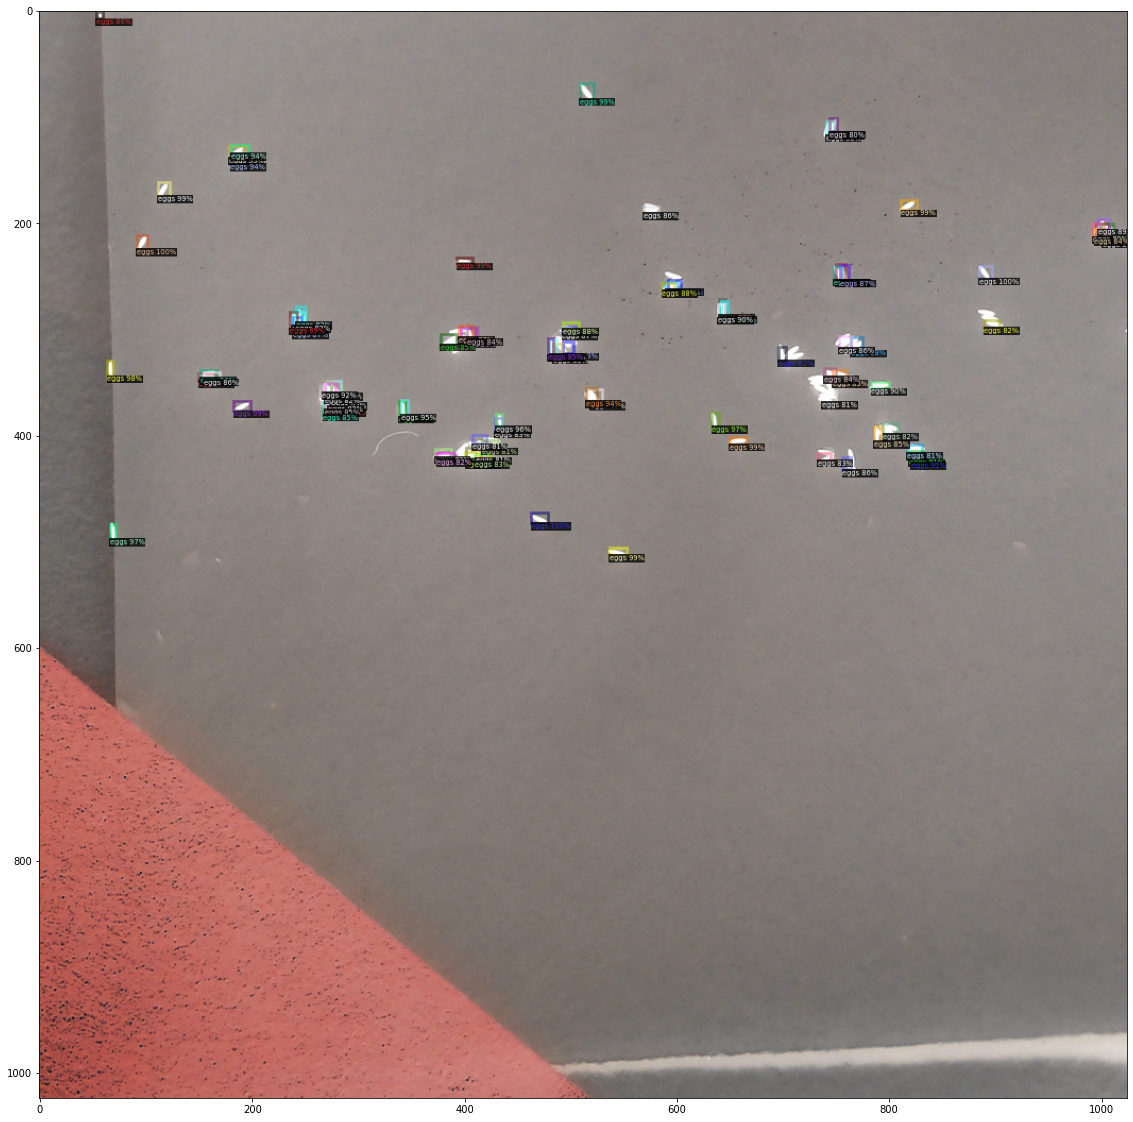

In [42]:
visualizer = Visualizer(image, 
                        metadata=train_metadata,
                        scale=1.0)

visualizer = visualizer.draw_instance_predictions(outputs['instances'].to("cpu"))

plt.figure(figsize=(20, 20))
plt.imshow(visualizer.get_image())

# Retinanet Training

In [93]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/retinanet_R_50_FPN_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.002

# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER
cfg.SOLVER.MAX_ITER = 400

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.OUTPUT_DIR = 'output/retinanet'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

Loading config /usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[06/19 10:17:56 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

## Making a CallBack

In [94]:
class WandbCallback(HookBase):

  def __init__(self, cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths):
    super().__init__

    # Setting up all of our parameters
    self.cfg = cfg
    self.VAL_DATASET_NAME = VAL_DATASET_NAME
    self.trainer = trainer
    self.train_metadata = train_metadata
    self.imgs_paths = imgs_paths

  # Function to run every iteration, for sending all metrics to weights & biases
  def after_step(self):

    storage = get_event_storage()

    values = storage.latest().items()

    wandb.log(dict(values))

    if self.trainer.iter % 50 == 0:

      self.trainer.model.eval()

      for img_path in imgs_paths:

        image = cv2.imread(img_path)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        with torch.no_grad():
          outputs = self.trainer.model([
                                        {"image":torch.from_numpy(image.transpose(2, 0, 1))}
          ]) 

        
        box_data = []

        for count, bbox in enumerate(outputs[0]['instances'].pred_boxes.tensor.cpu().numpy()):

          box_data.append({"position":{
              "minX":int(bbox[0]),
              "maxX":int(bbox[2]),
              "minY":int(bbox[1]),
              "maxY":int(bbox[3])
          },
          "class_id":0,
          "domain":"pixel",
          "box_caption":str(outputs[0]['instances'].scores.cpu().numpy()[count]),
          "scores":{"predictions":float(outputs[0]['instances'].scores.cpu().numpy()[count])}
          })

        boxes = {"predictions":{
            "box_data":box_data,
            "class_labels":{0:"eggs"}
        }}

        wandb.log({img_path.split('/')[-1]:wandb.Image(image, boxes=boxes)})


      self.trainer.model.train()

    
  # Called after the model training is completed, to evaluate our model using validation dataset
  def after_train(self):

    evaluator = COCOEvaluator(self.VAL_DATASET_NAME, self.cfg, False, output_dir=self.cfg.OUTPUT_DIR)

    val_loader = build_detection_test_loader(self.cfg, self.VAL_DATASET_NAME,)

    valResults = inference_on_dataset(self.trainer.model, val_loader, evaluator)

    wandb.log(dict(valResults['bbox']))


## Setting up Callbacks

In [95]:
imgs_paths = glob.glob("/content/drive/My Drive/dataset_inverted/*.png")[:5]
imgs_paths

wandb_callback = WandbCallback(cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths)

trainer.register_hooks([wandb_callback])

trainer.resume_or_load(resume=False)

model_final_bfca0b.pkl: 152MB [00:03, 38.5MB/s]                           
Skip loading parameter 'head.cls_score.weight' to the model due to incompatible shapes: (720, 256, 3, 3) in the checkpoint but (9, 256, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'head.cls_score.bias' to the model due to incompatible shapes: (720,) in the checkpoint but (9,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
head.cls_score.{bias, weight}


## Setting up Wandb

In [96]:
wandb.init(project='egg detection', config=cfg.copy(), name='retinanet', notes='Training Our first retiannet model')

rpn/num_pos_anchors,27.0
rpn/num_neg_anchors,229.0
roi_head/num_fg_samples,41.25
roi_head/num_bg_samples,470.75
fast_rcnn/cls_accuracy,0.98486
fast_rcnn/fg_cls_accuracy,0.90303
fast_rcnn/false_negative,0.09697
data_time,0.01258
total_loss,0.26472
loss_cls,0.03792
loss_box_reg,0.16617


rpn/num_pos_anchors,▂▂▄▂▆▅▃▃▃▂▄▁▂▄▃▃▃█▇▁▇▅▆▁▄█▆▆▄▅▇▃▅▂▂▅▄▂▂▃
rpn/num_neg_anchors,▇▇▅▇▃▄▆▆▆▇▅█▇▅▆▆▆▁▂█▂▄▃█▅▁▃▃▅▄▂▆▄▇▇▄▅▇▇▆
roi_head/num_fg_samples,▁▃▅▃▅▅▂▂▃▃▃▁▂▃▄▃▄▇▆▂▆▄▇▁▃█▅▅▄▅▇▄▅▃▃▅▄▃▂▃
roi_head/num_bg_samples,█▆▄▆▄▄▇▇▆▆▆█▇▆▅▆▅▂▃▇▃▅▂█▆▁▄▄▅▄▂▅▄▆▆▄▅▆▇▆
fast_rcnn/cls_accuracy,▇▆▅▆▂▄▆▇▇▇▅█▇▆▆▆▆▃▁█▄▆▄█▆▃▄▄▆▄▂▇▆▆█▅▅▇▇▇
fast_rcnn/fg_cls_accuracy,▁▇▇█▇▇▇▇█▇██▇██▇███████████████████████▇
fast_rcnn/false_negative,█▂▂▁▂▂▂▂▁▂▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂
data_time,▄▃▃▂▄▃▄▃▁▃▄▃▄▄▆▄▄▅▂▄▄▄▁▂▄▃▁▁▂▃▄▅▃█▂▄▃▃▂▃
total_loss,▂▂▅▃▅▅▂▂▂▂▃▁▁▃▃▃▃▇▆▁▅▄▆▁▃▆▄▅▄▄█▃▄▂▂▄▃▂▁▂
loss_cls,▃▂▄▂▅▄▂▂▂▂▃▁▁▃▃▂▃▅▆▁▄▃▄▁▂▅▄▄▃▄█▂▃▂▁▃▃▂▁▂
loss_box_reg,▁▂▆▃▅▆▃▃▃▃▃▁▂▃▄▃▄█▆▂▆▅█▂▃▇▅▅▅▄▆▄▆▃▃▅▄▃▂▃


## Training Our Model

In [97]:
trainer.train()

[06/19 10:18:32 d2.engine.train_loop]: Starting training from iteration 0
[06/19 10:18:44 d2.utils.events]:  eta: 0:02:06  iter: 19  total_loss: 2.620  loss_cls: 1.468  loss_box_reg: 1.152  time: 0.3314  data_time: 0.0335  lr: 0.000040  max_mem: 6620M
[06/19 10:18:50 d2.utils.events]:  eta: 0:02:00  iter: 39  total_loss: 1.210  loss_cls: 0.636  loss_box_reg: 0.598  time: 0.3359  data_time: 0.0132  lr: 0.000080  max_mem: 6620M
[06/19 10:19:01 d2.utils.events]:  eta: 0:01:54  iter: 59  total_loss: 0.917  loss_cls: 0.318  loss_box_reg: 0.549  time: 0.3372  data_time: 0.0132  lr: 0.000120  max_mem: 6620M
[06/19 10:19:08 d2.utils.events]:  eta: 0:01:47  iter: 79  total_loss: 0.828  loss_cls: 0.282  loss_box_reg: 0.555  time: 0.3369  data_time: 0.0131  lr: 0.000160  max_mem: 6620M
[06/19 10:19:15 d2.utils.events]:  eta: 0:01:41  iter: 99  total_loss: 0.788  loss_cls: 0.262  loss_box_reg: 0.526  time: 0.3396  data_time: 0.0125  lr: 0.000200  max_mem: 6620M
[06/19 10:19:25 d2.utils.events]:  e

# Loading Our Model & Making Predictions Retinanet

In [98]:
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + '/model_final.pth'

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

In [99]:
image = cv2.imread("/content/drive/My Drive/dataset_inverted/97.png")

outputs = predictor(image)

In [100]:
outputs

{'instances': Instances(num_instances=2, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 996.2881,  201.5882, 1007.6298,  213.7310],
         [ 821.7802,  412.2128,  832.3920,  420.9445]], device='cuda:0')), scores: tensor([0.7200, 0.7067], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0')])}

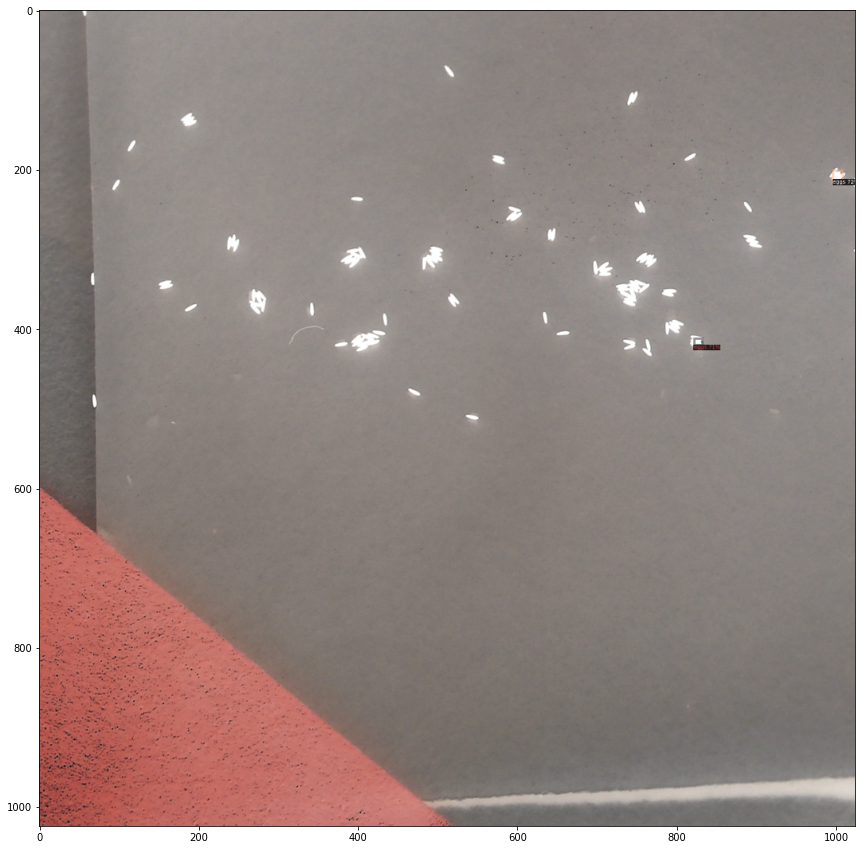

In [101]:
visualizer = Visualizer(image, 
                        metadata=train_metadata,
                        scale=1.0)

visualizer = visualizer.draw_instance_predictions(outputs['instances'].to("cpu"))

plt.figure(figsize=(15, 15))
plt.imshow(visualizer.get_image())